In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('airline_passengers.csv', header = 0)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [9]:
df = df.rename(columns={'Month': 'ds',
                        'Passengers': 'y'})

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


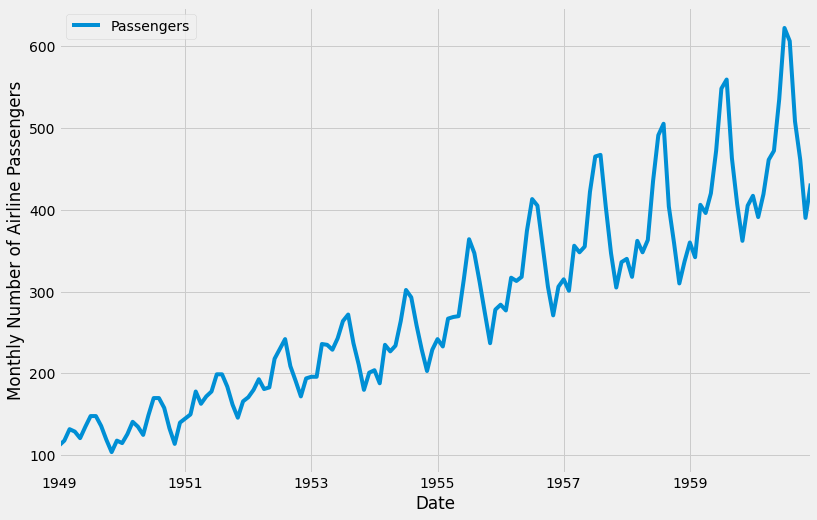

In [5]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

# Model

In [6]:
my_model = Prophet(interval_width=0.95)

In [10]:
my_model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 6 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [13]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [16]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.579944,602.935713,693.750696
176,1963-09-01,602.079208,556.931428,648.290477
177,1963-10-01,566.050088,521.216321,614.474554
178,1963-11-01,534.086298,490.525144,576.043181
179,1963-12-01,563.665422,519.480959,610.958190


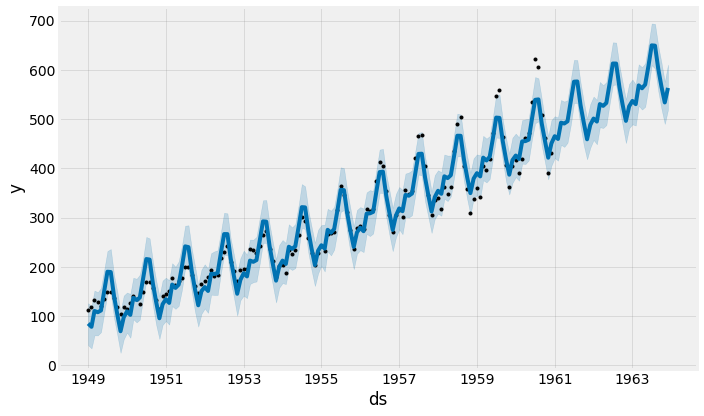

In [19]:
my_model.plot(forecast,uncertainty=True);

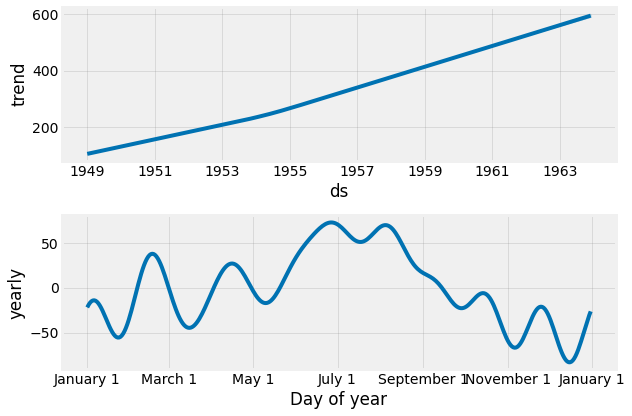

In [20]:
my_model.plot_components(forecast);